## Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# roc curve and auc score
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

# n_samples : give me sample of 2000 datapoints
# n_classes : number of classes should be 2
# weight[1,1] : Weight should be equal, that mean if one category has 1000 datapoints the other category also have 1000 datapoints
# random_state = 1

In [6]:
X.shape 
# 2000 datapoints and 20 features

(2000, 20)

In [7]:
y

array([0, 0, 0, ..., 1, 1, 0])

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Import roc_curve and roc_auc_score

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Logistic Regression

In [12]:
# In logistic regression anything greater then 0.5 will become 1 anything smaller then 0.5 will be 0
# Here in this problem statement by default the probability is 0.5

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)


LogisticRegression()

In [17]:
# these are all the probabilities,
# The probability of getting zero and the probability of getting one
ytrain_pred = log_classifier.predict_proba(X_train)
ytrain_pred

array([[9.99688479e-01, 3.11520635e-04],
       [9.99966000e-01, 3.39995695e-05],
       [2.09976771e-02, 9.79002323e-01],
       ...,
       [8.58463348e-01, 1.41536652e-01],
       [9.99422335e-01, 5.77665099e-04],
       [6.07714035e-01, 3.92285965e-01]])

In [18]:
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


- The area for train is 98% and the area for test is 98% so wuder the area better is the model

In [19]:
# The whole code can be written like this

# from sklearn.linear_model import LogisticRegression
# log_classifier=LogisticRegression()
# log_classifier.fit(X_train, y_train)
# ytrain_pred = log_classifier.predict_proba(X_train)
# print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
# ytest_pred = log_classifier.predict_proba(X_test)
# print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

## No we will focus on selecting the best threshold for maximum accuracy

In [27]:
pred=[]
for model in [log_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9885777777777777


In [58]:
pd.concat(pred,axis=1)

,0
0,0.991861
1,0.000008
2,0.966929
3,0.761539
4,0.779443
...,...
595,0.024239
596,0.000003
597,0.984385
598,0.001147


In [30]:
final_prediction

0      0.991861
1      0.000008
2      0.966929
3      0.761539
4      0.779443
         ...   
595    0.024239
596    0.000003
597    0.984385
598    0.001147
599    0.989540
Length: 600, dtype: float64

Now we will find the threshold using final_prediction datapoints

### Calculate the ROC Curve

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.99970150e+00, 9.99701500e-01, 9.96158877e-01, 9.96129645e-01,
       9.47070326e-01, 9.46204924e-01, 8.65466258e-01, 8.63536252e-01,
       8.53176377e-01, 8.50056757e-01, 8.41421435e-01, 8.39367909e-01,
       8.15506733e-01, 8.14031083e-01, 7.10421057e-01, 6.95370907e-01,
       6.71015565e-01, 6.37604614e-01, 6.28000190e-01, 6.25419393e-01,
       5.85991638e-01, 5.72811301e-01, 5.44222421e-01, 5.09091565e-01,
       5.05747727e-01, 4.25206094e-01, 4.00497635e-01, 3.57672321e-01,
       3.57418343e-01, 3.08833885e-01, 3.04354181e-01, 2.98609914e-01,
       2.96733938e-01, 2.62534344e-01, 2.58894947e-01, 2.46055520e-01,
       2.13787155e-01, 8.32534990e-02, 8.12384385e-02, 5.22202002e-06,
       4.99437632e-06, 2.17237065e-07])

In [32]:
tpr

array([0.        , 0.00333333, 0.11      , 0.11      , 0.65666667,
       0.65666667, 0.81      , 0.81      , 0.83      , 0.83      ,
       0.84333333, 0.84333333, 0.87333333, 0.87333333, 0.93666667,
       0.93666667, 0.95      , 0.95      , 0.95333333, 0.95333333,
       0.96333333, 0.96333333, 0.97      , 0.97      , 0.97333333,
       0.97333333, 0.97666667, 0.97666667, 0.98      , 0.98      ,
       0.98333333, 0.98333333, 0.98666667, 0.98666667, 0.99      ,
       0.99      , 0.99333333, 0.99333333, 0.99666667, 0.99666667,
       1.        , 1.        ])

In [33]:
fpr

array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.00666667, 0.00666667, 0.01      , 0.01      , 0.01333333,
       0.01333333, 0.01666667, 0.01666667, 0.02      , 0.02      ,
       0.02333333, 0.02333333, 0.03      , 0.03      , 0.03333333,
       0.03333333, 0.03666667, 0.03666667, 0.04      , 0.04      ,
       0.05666667, 0.05666667, 0.06333333, 0.06333333, 0.07666667,
       0.07666667, 0.08      , 0.08      , 0.09      , 0.09      ,
       0.1       , 0.1       , 0.17      , 0.17      , 0.95666667,
       0.95666667, 1.        ])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    # where the final_prediction > thres make it as 1 or make it as 0
    y_pred = np.where(final_prediction>thres,1,0) 
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
23,0.509092,0.966667
21,0.572811,0.965000
24,0.505748,0.965000
22,0.544222,0.965000
20,0.585992,0.963333


- By seeing the accuracy we should select the threshold 0.5090 </br>
- we should select threshold whose accuray is highest </br>
- but we have to see the true positive rate and false positive rate with respect to 0.5090

In [53]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

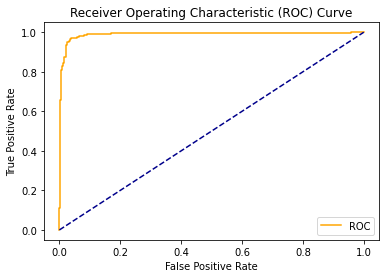

In [54]:
plot_roc_curve(fpr,tpr)